In [ ]:
#https://datacarpentry.org/r-raster-vector-geospatial/01-raster-structure/index.html
#install packages required and import the library
install.packages(c("dplyr", "ggplot2", "raster", "rgdal", "rasterVis", "sf"))
library(raster)
library(rgdal)
library(ggplot2)
library(dplyr)

In [ ]:
#download the data using the link and add the file location of the tif
#https://ndownloader.figshare.com/articles/2009586/versions/10
#We will be working with a series of GeoTIFF files in this lesson. The GeoTIFF format contains a set of embedded tags with metadata about the raster data. We can use the function GDALinfo() to get information about our raster data before we read that data into R. It is ideal to do this before importing your data.

GDALinfo("C:\\Users\\binda\\Downloads\\2009586\\NEON-DS-Airborne-Remote-Sensing\\NEON-DS-Airborne-Remote-Sensing\\HARV\\DSM\\HARV_dsmCrop.tif")

In [ ]:
#If you wish to store this information in R, you can do the following:
#Each line of text that was printed to the console is now stored as an element of the character vector HARV_dsmCrop_info. We will be exploring this data throughout this episode. By the end of this episode, you will be able to explain and understand the output above.
HARV_dsmCrop_info <- capture.output(
  GDALinfo("C:\\Users\\binda\\Downloads\\2009586\\NEON-DS-Airborne-Remote-Sensing\\NEON-DS-Airborne-Remote-Sensing\\HARV\\DSM\\HARV_dsmCrop.tif")
)

In [ ]:
#First we will load our raster file into R and view the data structure.

DSM_HARV <- 
  raster("C:\\Users\\binda\\Downloads\\2009586\\NEON-DS-Airborne-Remote-Sensing\\NEON-DS-Airborne-Remote-Sensing\\HARV\\DSM\\HARV_dsmCrop.tif")

DSM_HARV

In [ ]:
#The information above includes a report of min and max values, but no other data range statistics. Similar to other R data structures like vectors and data frame columns, descriptive statistics for raster data can be retrieved like
summary(DSM_HARV)

#Warning in .local(object, ...): summary is an estimate based on a sample of 1e+05 cells (4.31% of all cells)

In [ ]:
#but note the warning - unless you force R to calculate these statistics using every cell in the raster, it will take a random sample of 100,000 cells and calculate from that instead. To force calculation on more, or even all values, you can use the parameter maxsamp:

summary(DSM_HARV, maxsamp = ncell(DSM_HARV))

In [ ]:
#You may not see major differences in summary stats as maxsamp increases, except with very large rasters.

#To visualise this data in R using ggplot2, we need to convert it to a dataframe. The raster package has an built-in function for conversion to a plotable dataframe.
DSM_HARV_df <- as.data.frame(DSM_HARV, xy = TRUE)

In [ ]:
#Now when we view the structure of our data, we will see a standard dataframe format.
str(DSM_HARV_df)

In [ ]:
#We can use ggplot() to plot this data. We will set the color scale to scale_fill_viridis_c which is a color-blindness friendly color scale. We will also use the coord_quickmap() function to use an approximate Mercator projection for our plots. This approximation is suitable for small areas that are not too close to the poles. Other coordinate systems are available in ggplot2 if needed, you can learn about them at their help page ?coord_map.
ggplot() +
    geom_raster(data = DSM_HARV_df , aes(x = x, y = y, fill = HARV_dsmCrop)) +
    scale_fill_viridis_c() +
    coord_quickmap()

In [ ]:
minValue(DSM_HARV)
maxValue(DSM_HARV)

In [ ]:
DSM_HARV <- setMinMax(DSM_HARV)

In [ ]:
DSM_HARV

In [ ]:
nlayers(DSM_HARV)

In [ ]:
scale_fill_viridis_c(na.value = 'deeppink')

In [ ]:
#We can use ggplot() to plot this data. We will set the color scale to scale_fill_viridis_c which is a color-blindness friendly color scale. We will also use the coord_quickmap() function to use an approximate Mercator projection for our plots. This approximation is suitable for small areas that are not too close to the poles. Other coordinate systems are available in ggplot2 if needed, you can learn about them at their help page ?coord_map.
ggplot() +
    geom_raster(data = DSM_HARV_df , aes(x = x, y = y, fill = HARV_dsmCrop)) +
    scale_fill_viridis_c() +
    coord_quickmap()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



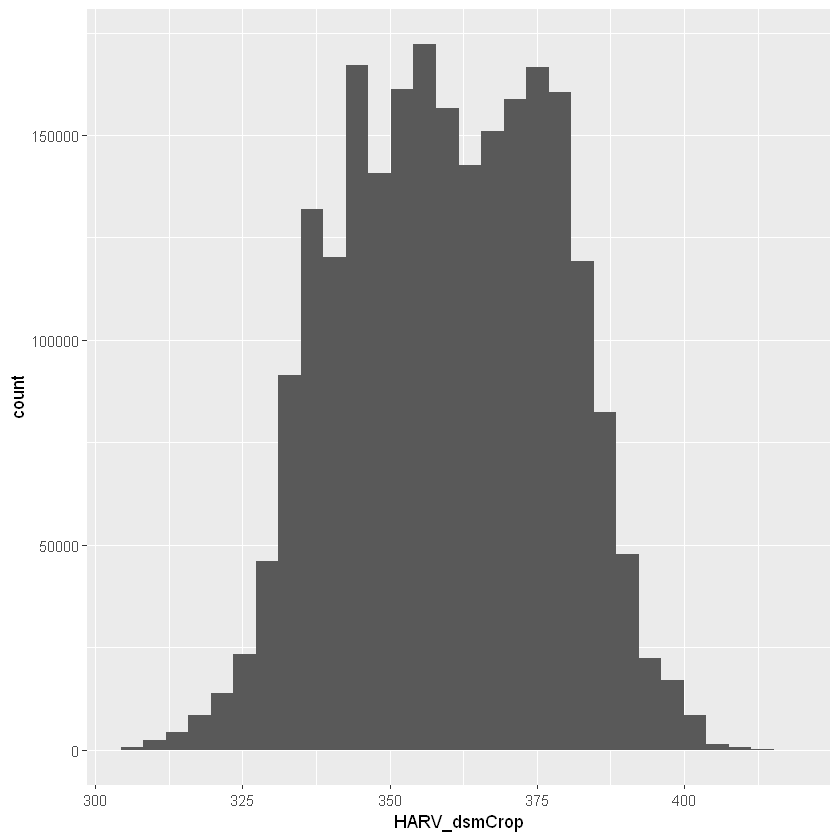

In [42]:
ggplot() +
    geom_histogram(data = DSM_HARV_df, aes(HARV_dsmCrop))

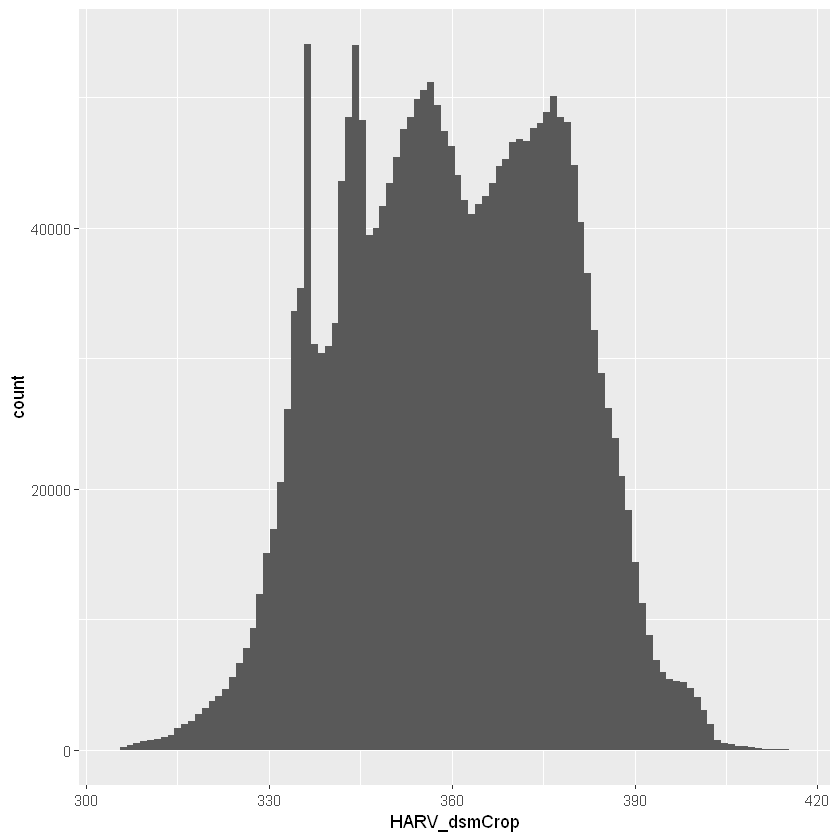

In [45]:
ggplot() +
    geom_histogram(data = DSM_HARV_df, aes(HARV_dsmCrop), bins = 100)

<b>Plotting Data Using Breaks</b>
In the previous episode, we viewed our data using a continuous color ramp. For clarity and visibility of the plot, we may prefer to view the data “symbolized” or colored according to ranges of values. This is comparable to a “classified” map. To do this, we need to tell ggplot how many groups to break our data into, and where those breaks should be. To make these decisions, it is useful to first explore the distribution of the data using a bar plot. To begin with, we will use dplyr’s mutate() function combined with cut() to split the data into 3 bins.

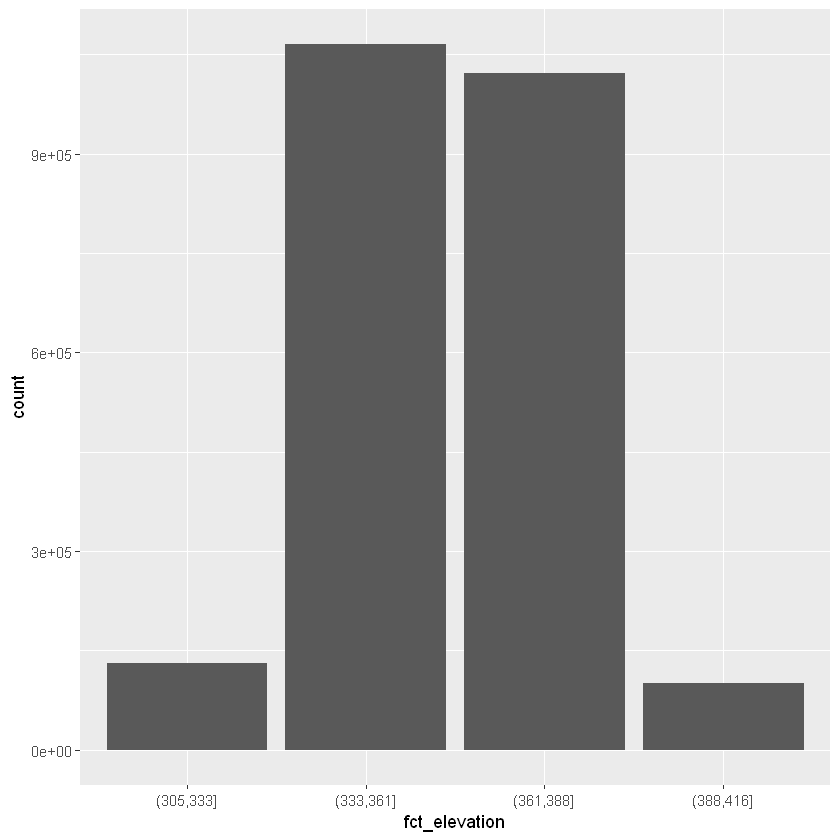

In [63]:
DSM_HARV_df <- DSM_HARV_df %>%
                mutate(fct_elevation = cut(HARV_dsmCrop, breaks = 4))

ggplot() +
    geom_bar(data = DSM_HARV_df, aes(fct_elevation))

<i>If we want to know the cutoff values for the groups, we can ask for the unique values of fct_elevation:</i>

In [64]:
unique(DSM_HARV_df$fct_elevation)

[1] (388,416] (361,388] (333,361] (305,333]
Levels: (305,333] (333,361] (361,388] (388,416]

<i>And we can get the count of values in each group using dplyr’s group_by() and count() functions:<i>

In [65]:
DSM_HARV_df %>%
        group_by(fct_elevation) %>%
        count()

fct_elevation,n
<fct>,<int>
"(305,333]",131250
"(333,361]",1065457
"(361,388]",1022206
"(388,416]",100886


<i>We might prefer to customize the cutoff values for these groups. Lets round the cutoff values so that we have groups for the ranges of 301–350 m, 351–400 m, and 401–450 m. To implement this we will give mutate() a numeric vector of break points instead of the number of breaks we want.</i>

In [68]:
custom_bins <- c(300, 350, 400, 450, 500)

DSM_HARV_df <- DSM_HARV_df %>%
  mutate(fct_elevation_2 = cut(HARV_dsmCrop, breaks = custom_bins))

unique(DSM_HARV_df$fct_elevation)

[1] (388,416] (361,388] (333,361] (305,333]
Levels: (305,333] (333,361] (361,388] (388,416]

<b><h4>Data Tips</h4></b>
Note that when we assign break values a set of 4 values will result in 3 bins of data.

The bin intervals are shown using ( to mean exclusive and ] to mean inclusive. For example: (305, 342] means “from 306 through 342”.

And now we can plot our bar plot again, using the new groups:



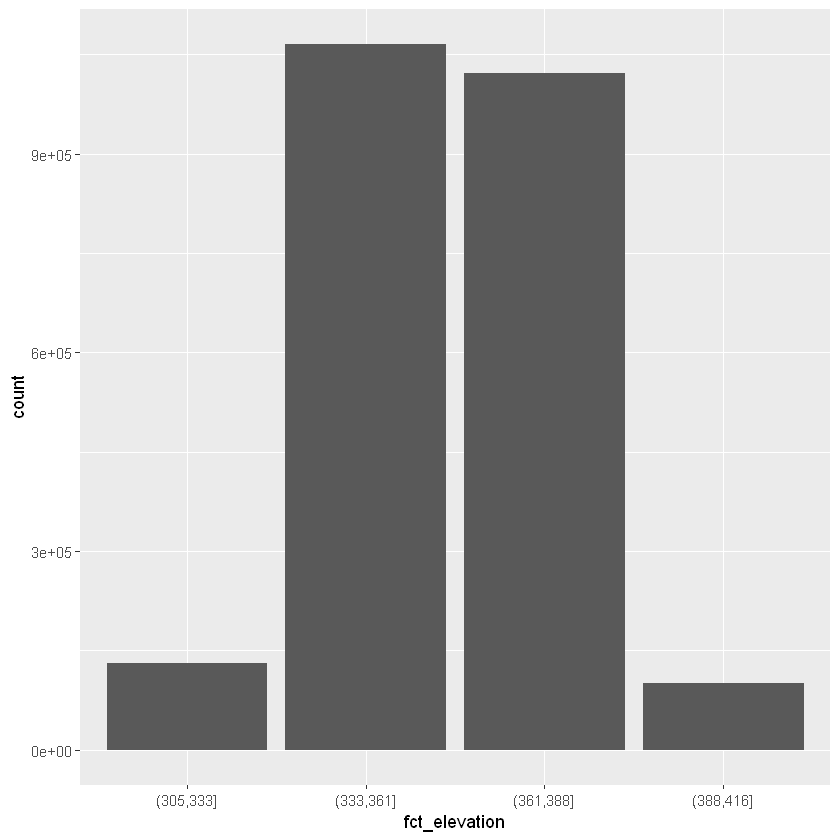

In [67]:
ggplot() +
  geom_bar(data = DSM_HARV_df, aes(fct_elevation))

And we can get the count of values in each group in the same way we did before:

In [69]:
DSM_HARV_df %>%
  group_by(fct_elevation) %>%
  count()

fct_elevation,n
<fct>,<int>
"(305,333]",131250
"(333,361]",1065457
"(361,388]",1022206
"(388,416]",100886


We can use those groups to plot our raster data, with each group being a different color:

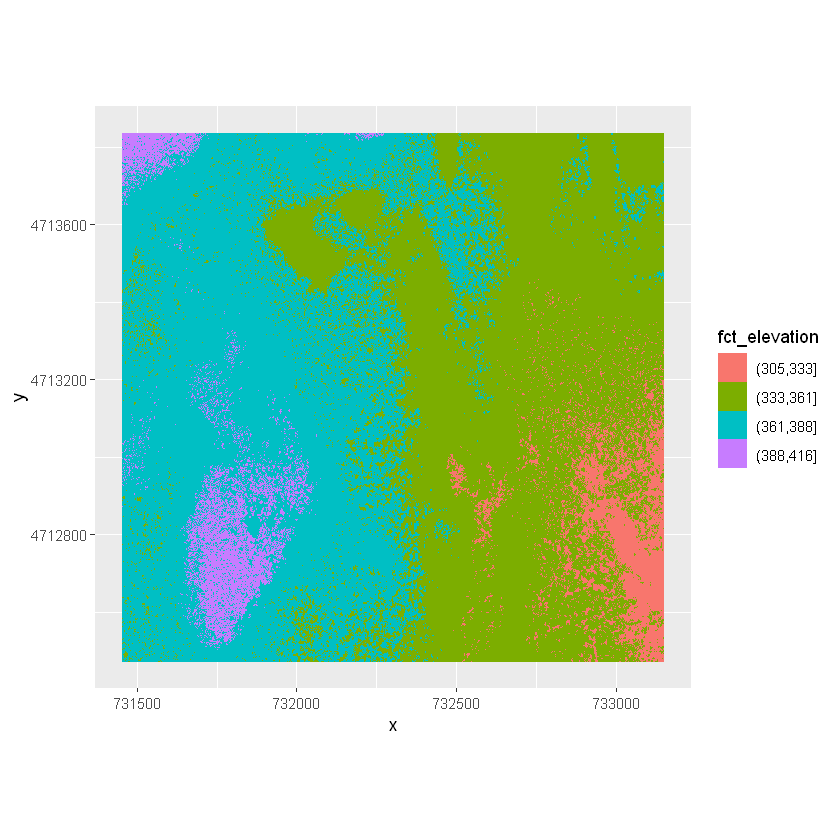

In [70]:
ggplot() +
  geom_raster(data = DSM_HARV_df , aes(x = x, y = y, fill = fct_elevation)) + 
  coord_quickmap()

The plot above uses the default colors inside ggplot for raster objects. We can specify our own colors to make the plot look a little nicer. R has a built in set of colors for plotting terrain, which are built in to the terrain.colors() function. Since we have three bins, we want to create a 3-color palette:

In [71]:
terrain.colors(4)

[1] "#00A600" "#E6E600" "#ECB176" "#F2F2F2"

The terrain.colors() function returns hex colors - each of these character strings represents a color. To use these in our map, we pass them across using the scale_fill_manual() function.

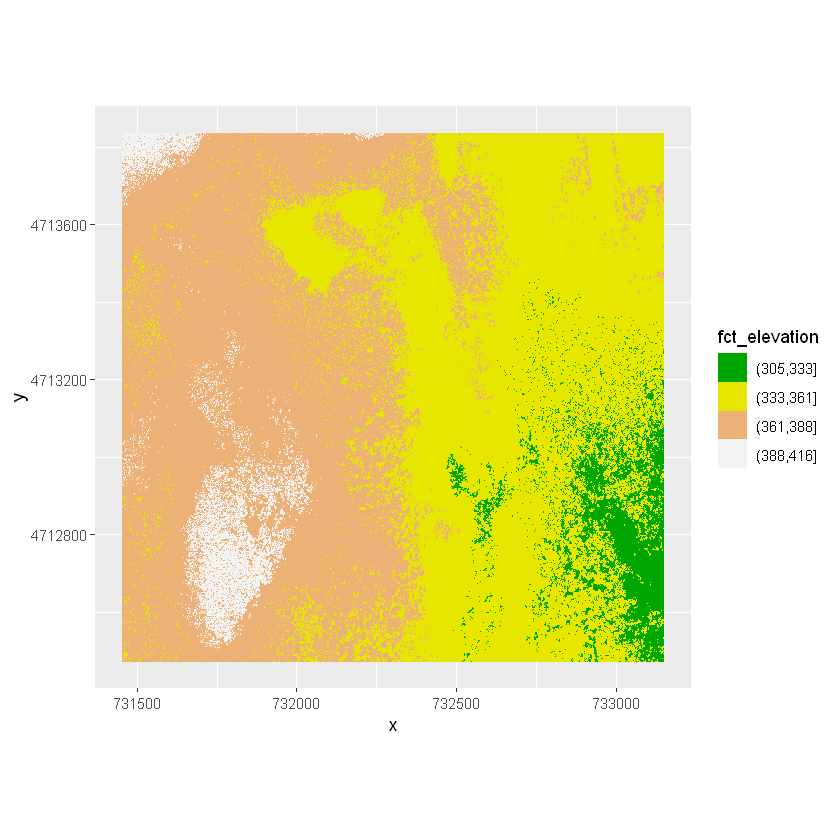

In [74]:
ggplot() +
 geom_raster(data = DSM_HARV_df , aes(x = x, y = y,
                                      fill = fct_elevation)) + 
    scale_fill_manual(values = terrain.colors(4)) + 
    coord_quickmap()

More Plot Formatting
If we need to create multiple plots using the same color palette, we can create an R object (my_col) for the set of colors that we want to use. We can then quickly change the palette across all plots by modifying the my_col object, rather than each individual plot.

We can label the x- and y-axes of our plot too using xlab and ylab. We can also give the legend a more meaningful title by passing a value to the name argument of the scale_fill_manual() function.

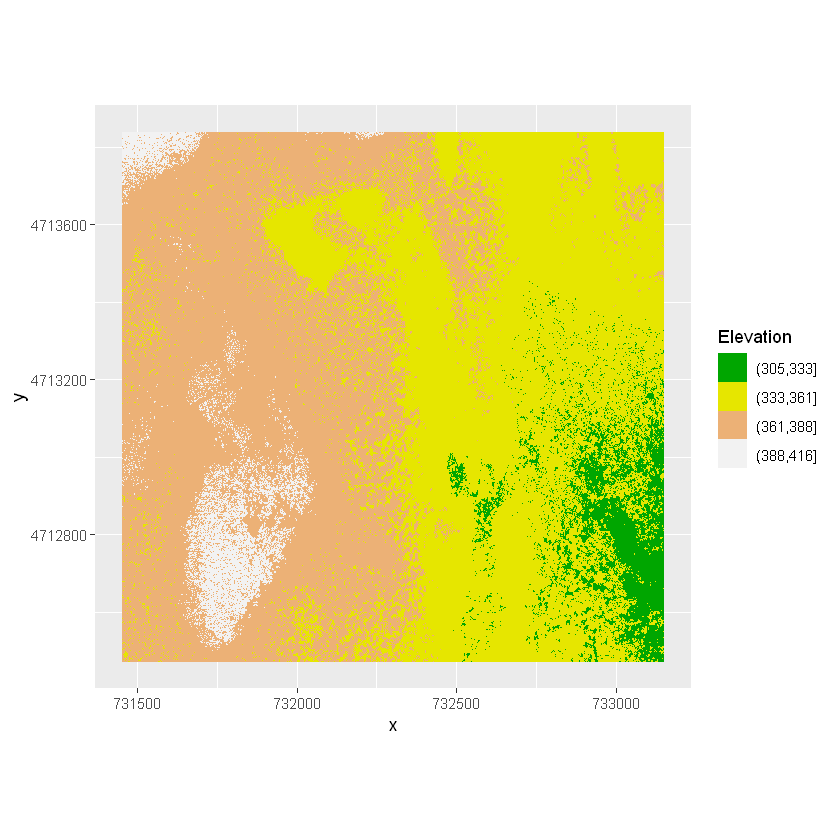

In [75]:
my_col <- terrain.colors(4)

ggplot() +
 geom_raster(data = DSM_HARV_df , aes(x = x, y = y,
                                      fill = fct_elevation)) + 
    scale_fill_manual(values = my_col, name = "Elevation") + 
    coord_quickmap()

Or we can also turn off the labels of both axes by passing element_blank() to the relevant part of the theme() function.

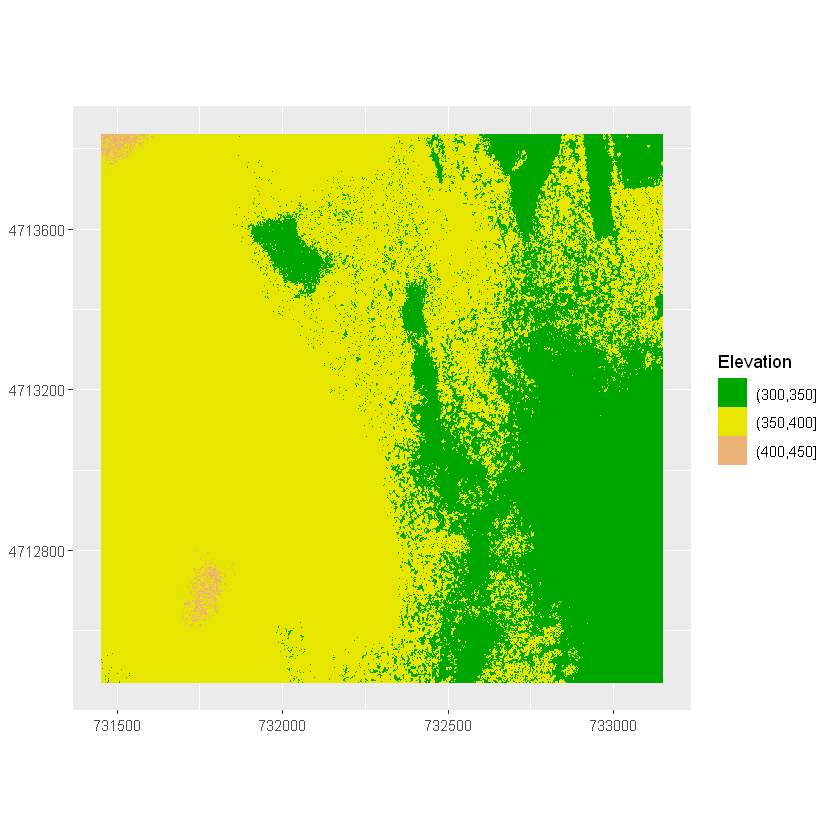

In [76]:
ggplot() +
 geom_raster(data = DSM_HARV_df , aes(x = x, y = y,
                                      fill = fct_elevation_2)) + 
    scale_fill_manual(values = my_col, name = "Elevation") +
    theme(axis.title = element_blank()) + 
    coord_quickmap()

<b>Challenge: Plot Using Custom Breaks</b><br>
Create a plot of the Harvard Forest Digital Surface Model (DSM) that has:

Six classified ranges of values (break points) that are evenly divided among the range of pixel values.
Axis labels.
A plot title.

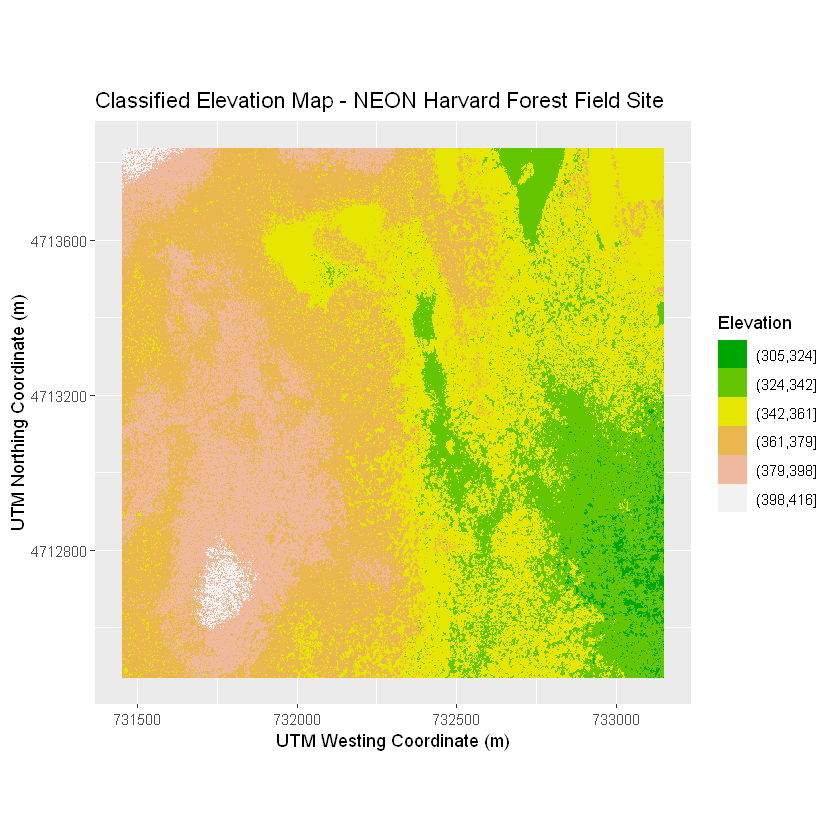

In [77]:
DSM_HARV_df <- DSM_HARV_df  %>%
               mutate(fct_elevation_6 = cut(HARV_dsmCrop, breaks = 6)) 

 my_col <- terrain.colors(6)

ggplot() +
    geom_raster(data = DSM_HARV_df , aes(x = x, y = y,
                                      fill = fct_elevation_6)) + 
    scale_fill_manual(values = my_col, name = "Elevation") + 
    ggtitle("Classified Elevation Map - NEON Harvard Forest Field Site") +
    xlab("UTM Westing Coordinate (m)") +
    ylab("UTM Northing Coordinate (m)") + 
    coord_quickmap()